In [192]:
import torch
import sys
sys.path.append('../')
from pointnet.sh import calc_coeficients,calc_sh,flat2lm_index
from PIL import Image,ImageOps
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [171]:
img = Image.open("Lenna.png")
diff = abs(img.width - img.height)
new_img = Image.new('RGBA', (img.width,img.width), (255,255,255,255))
new_img.paste(img,(0, diff//2))

res = 100
img = new_img.resize((res,res))
img = ImageOps.grayscale(img)
img = torch.from_numpy(np.array(img)).float()/255

In [177]:
l_max = 10
x = torch.arange(0,1,1/res)
grid = torch.dstack(torch.meshgrid((1-x)*torch.pi,x*2*torch.pi,indexing="ij")).flatten(0,1)
Y =calc_sh(l_max,grid)
coefs = calc_coeficients(l_max,grid,img.flatten())
coefs

tensor([ 1.7259e+00,  1.5155e-01, -8.7771e-02, -2.1566e-02,  5.4259e-02,
         7.4674e-02,  1.1484e-02, -1.4110e-01,  1.6831e-01,  1.5626e-01,
        -7.8914e-02,  6.4159e-02,  2.1763e-02,  8.7560e-02,  3.9065e-02,
         3.7054e-02,  3.4900e-02,  1.4122e-02,  2.0880e-02,  4.3081e-02,
        -4.6009e-02, -1.4079e-02, -5.2363e-04,  1.1255e-01, -5.2887e-02,
        -2.6665e-02,  3.6953e-02, -1.7311e-02,  3.6255e-02,  2.0492e-02,
         3.0916e-02,  3.9709e-02, -4.8416e-02, -3.0124e-02, -6.4774e-03,
         4.3897e-02, -7.5499e-02,  4.3780e-02,  2.5805e-02,  9.7903e-02,
         4.9581e-02,  4.5746e-02,  3.3103e-02,  6.2006e-02,  2.9705e-02,
        -2.6710e-02,  4.1433e-02, -9.9908e-03, -7.7880e-02,  2.7561e-02,
        -6.3496e-02,  7.9477e-02,  4.9736e-02, -2.3611e-02,  2.4334e-02,
         2.5495e-02, -4.0060e-02, -1.0958e-02,  1.6714e-03,  5.9063e-02,
        -5.1322e-02,  5.7396e-02,  1.1108e-02,  5.0348e-02, -9.2134e-02,
         4.6654e-03, -3.4475e-02, -2.3459e-02,  5.1

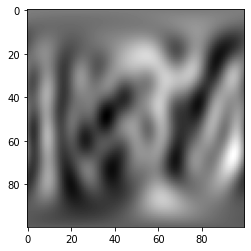

In [178]:

plt.imshow((Y@coefs).reshape(res,res),cmap="gray")

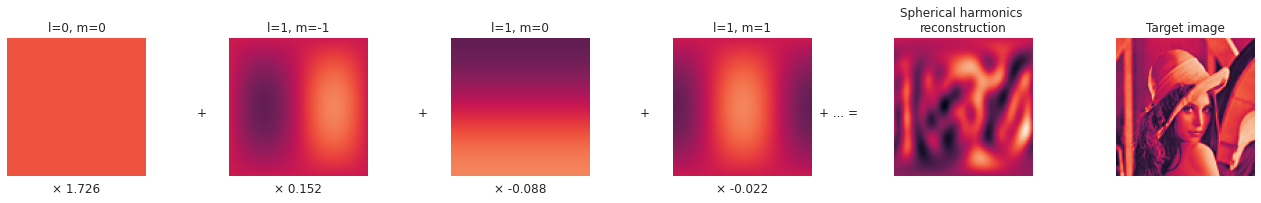

In [203]:
fig,axes = plt.subplots(1,6,figsize=(6*3,1*3),layout="tight")

num_shs = 4

for i in range(num_shs):
    l,m = flat2lm_index(i)
    axes[i].imshow(Y[:,i].reshape(res,res),vmin=-1,vmax=1)
    axes[i].set_title(f"l={l}, m={m}")
    axes[i].axis("off")


    if i >0:
        axes[i].text(-.2, 0.5, '+',
                horizontalalignment='center',
                verticalalignment='top',
                transform=axes[i].transAxes)
    axes[i].text(0.5, -0.05, f"× {round(coefs[i].item()*1000)/1000}",
            horizontalalignment='center',
            verticalalignment='top',
            transform=axes[i].transAxes)

ax_r = axes[num_shs]
ax_t = axes[num_shs+1]
ax_r.imshow((Y@coefs).reshape(res,res))
ax_r.axis("off")
ax_r.set_title("Spherical harmonics \nreconstruction")


axes[num_shs-1].text(1.2, 0.5, '+ ... =',
        horizontalalignment='center',
        verticalalignment='top',
        transform=axes[num_shs-1].transAxes)

ax_t.imshow(img)
ax_t.axis("off")
ax_t.set_title("Target image")

fig.subplots_adjust(
                    wspace=0.4)

plt.savefig("sh_example.pdf")